# Pendeteksian dan Klasifikasi Tumor Otak Menggunakan Citra MRI
---

## Nama Anggota

- ##### SINDI SUTRISNO EKA : F1D02310026
- ##### KANDA RIFQI ALFAZ : F1D02310064
- ##### APTA MAHOGRA BHAMAKERTI : F1D022035
- ##### I MADE INDRA DWI PAYANA : F1D02310056
- ##### IDA BAGUS AMANTA PRADIPA KRISHNA : F1D02310059
---

# Project Overview

### Tujuan Proyek
Pada proyek ini, akan dilakukan eksperimen klasifikasi tumor otak berdasarkan citra MRI yang telah disiapkan sebelumnya. Tujuan utama dari proyek ini adalah sebagai berikut:

1. Menguji Kemampuan Implementasi PCD: Menguji kemampuan dalam mengimplementasikan teknik Pengolahan Citra  Digital (PCD) untuk melakukan deteksi dan klasifikasi tumor otak.

2. Pemilihan Preprocessing yang Tepat: Memilih dan menyesuaikan tahapan preprocessing yang paling sesuai dengan karakteristik data citra MRI yang digunakan.

3. Evaluasi Efektivitas Kombinasi Teknik: Mengevaluasi efektivitas dari berbagai kombinasi teknik preprocessing, ekstraksi fitur (feature extraction), dan model klasifikasi yang diterapkan.

### Metodologi dan Fokus Eksperimen
Fokus utama dalam proyek ini adalah pada ketepatan pemilihan teknik preprocessing dan proses ekstraksi fitur yang dilakukan. Hasil akurasi akhir bukanlah satu-satunya tolok ukur keberhasilan, melainkan pemahaman dalam analisis dan proses yang lebih diutamakan.

Eksperimen akan dilakukan melalui beberapa tahapan umum dalam Machine Learning, dengan penekanan pada:
1. Pemilihan Preprocessing: Tahapan preprocessing yang dipilih harus berdasarkan teknik-teknik yang telah dipelajari selama praktikum Modul 1 hingga 5.

2. Ekstraksi Fitur: Setelah preprocessing, akan dilakukan ekstraksi fitur dari citra.

3. Pembuatan Model Klasifikasi: Data hasil ekstraksi fitur akan digunakan untuk melatih model klasifikasi.

4. Eksperimen Berulang (Improvement): Untuk menguji pemahaman analisis, akan dilakukan eksperimen sebanyak tiga kali percobaan dengan notebook yang berbeda. Pada setiap percobaan, diharuskan melakukan improvement pada teknik preprocessing yang telah dibuat sebelumnya. Improvement dapat dilakukan dengan menyesuaikan jumlah atau jenis preprocessing pada setiap percobaan.
- Contoh Skenario Eksperimen: Jika total ada 5 teknik preprocessing (pre1, pre2, pre3, pre4, pre5), maka:
    - Percobaan Pertama: Menggunakan 2 preprocessing (misalnya, pre1, pre2).
    - Percobaan Kedua: Menggunakan 4 preprocessing (misalnya, pre1, pre2, pre3, pre4).
    - Percobaan Ketiga: Menggunakan 5 preprocessing (pre1, pre2, pre3, pre4, pre5).

5. Analisis Hasil: Dari setiap percobaan, akan dianalisis perbedaan akurasi yang dihasilkan oleh setiap model klasifikasi yang digunakan (misalnya, Random Forest, SVM, KNN).

Dengan demikian, proyek ini bertujuan untuk mengaplikasikan dan menganalisis berbagai teknik pengolahan citra digital dalam konteks medis, khususnya untuk pendeteksian tumor otak.

---

## Import Library

Blok kode di bawah ini bertujuan untuk mempersiapkan lingkungan Python guna menjalankan proyek Pengolahan Citra Digital (PCD) dan Machine Learning: pertama, `import os` untuk mengakses sistem file dan memuat dataset, serta `import cv2 as cv` (OpenCV) untuk membaca, mengubah ukuran, dan memproses citra; kemudian `import numpy as np` untuk komputasi numerik pada array citra dan `import pandas as pd` untuk manipulasi data tabular seperti metadata atau hasil ekstraksi fitur; selanjutnya `import matplotlib.pyplot as plt` dan `import seaborn as sns` untuk visualisasi dasar (menampilkan citra, grafik) dan grafik statistik yang lebih informatif; setelah itu, dari `sklearn.model_selection` diimpor `train_test_split` untuk memisahkan data latih dan uji, serta `cross_val_predict` untuk validasi silang, sementara dari `sklearn.metrics` diimpor `accuracy_score`, `classification_report`, `confusion_matrix`, `ConfusionMatrixDisplay`, `precision_score`, `recall_score`, dan `f1_score` untuk mengukur dan menampilkan performa model klasifikasi; model yang digunakan meliputi `RandomForestClassifier` (dari `sklearn.ensemble`), `SVC` (dari `sklearn.svm`), dan `KNeighborsClassifier` (dari `sklearn.neighbors`); terakhir, untuk ekstraksi fitur tekstur, `graycomatrix` dan `graycoprops` dari `skimage.feature` menghitung matriks ko-occurrence dan properti teksturnya, serta `entropy` dari `scipy.stats` menghitung nilai entropi sebagai fitur tambahan.```


In [2]:
# Import library
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from skimage.feature import graycomatrix, graycoprops
from scipy.stats import entropy
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay)
import seaborn as sns

## Data Loading

Setelah melakukan impor library yang dibutuhkan, tahapan selanjutnya adalah memuat dataset citra. Kode yang Anda gunakan dirancang untuk memproses dataset yang memiliki struktur folder tertentu.

##### Struktur Folder Dataset :
```
.
└── dataset/  <- (dataset_path)
    ├── normal/  <- (sub_folder, menjadi nilai untuk 'labels')
    │   ├── normal_1.jpg  <- (filename)
    │   ├── normal_2.jpg
    │   └── dst...
    └── tumor/
        ├── tumor_1.jpg
        ├── tumor_2.jpg
        └── dst...
```

Kode ini melakukan penelusuran (traversal) pada folder `dataset\` untuk menemukan setiap sub‐folder (misalnya `normal` dan `tumor`) dan di dalamnya mengambil semua file citra; setiap citra kemudian dibaca menggunakan OpenCV (`cv.imread`), dikonversi ke tipe data `uint8`, diubah menjadi skala abu‐abu (`cv.cvtColor(img, cv.COLOR_BGR2GRAY)`), dan di‐resize ke ukuran 256×256 piksel dengan fungsi `resize`; selanjutnya, citra yang telah diproses ditambahkan ke list `data`, labelnya (nama sub‐folder) ditambahkan ke list `labels`, dan nama file (dengan ekstensi) ditambahkan ke list `file_name`; setelah seluruh folder selesai diproses, list `data` dan `labels` diubah menjadi array NumPy sehingga siap digunakan untuk keperluan machine learning atau analisis lebih lanjut. 

In [3]:
data = []
labels = []
file_name = []
for sub_folder in os.listdir("dataset\\"):
    sub_folder_files = os.listdir(os.path.join("dataset\\", sub_folder))
    for i, filename in enumerate(sub_folder_files):
        img_path = os.path.join("dataset\\", sub_folder, filename)
        img = cv.imread(img_path)
        img = img.astype(np.uint8)
        img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        img = resize(img, 256, 256)
        
        data.append(img)
        labels.append(sub_folder)
        name = os.path.splitext(filename)[0]
        file_name.append(filename)
        
data = np.array(data)
labels = np.array(labels)

## Data Understanding

### Analisis Distribusi Data dan Penampilan Sampel Citra

Bagian kode ini pertama-tama melakukan analisis distribusi data dengan mengubah daftar label menjadi objek Pandas Series untuk menghitung frekuensi kemunculan setiap label. Kemudian, distribusi ini divisualisasikan sebagai diagram batang menggunakan `seaborn.barplot` untuk menunjukkan jumlah citra per kelas.

Selanjutnya, kode menampilkan informasi tentang dataset, termasuk total jumlah citra, total jumlah label, dan jumlah kelas unik beserta detail jumlah citra untuk setiap kelas. 

Kode kemudian mengambil sampel citra secara acak dari kelas 'normal' dan 'tumor' (masing-masing hingga 5 sampel, atau semua sampel jika jumlahnya kurang dari 5) dengan terlebih dahulu mencari indeks untuk setiap kelas, lalu memilih indeks secara acak menggunakan `numpy.random.choice`.

Akhirnya, sampel-sampel citra yang telah dipilih (yang sudah dalam format grayscale dan berukuran 256x256 dari variabel `data`) ditampilkan dalam satu figure menggunakan `matplotlib.pyplot.subplot`, lengkap dengan judul yang mencantumkan label dan nama file asli dari setiap citra sampel.

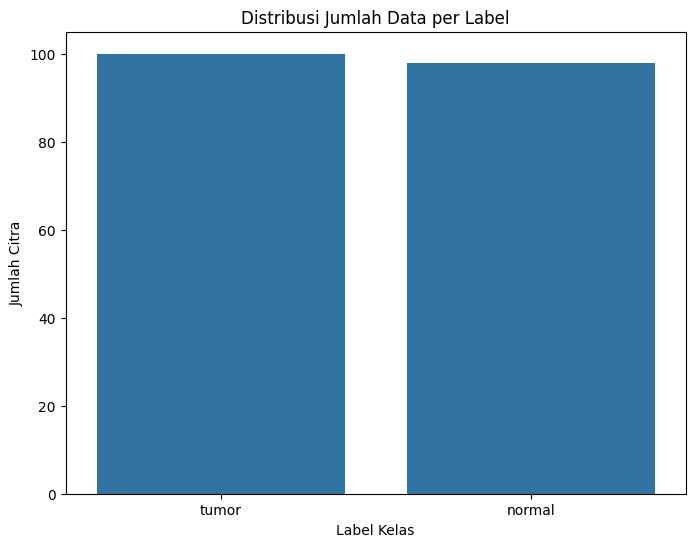

Total jumlah citra dalam dataset: 198
Total jumlah label dalam dataset: 198
Jumlah kelas unik: 2

Jumlah citra per kelas:
tumor     100
normal     98
Name: count, dtype: int64


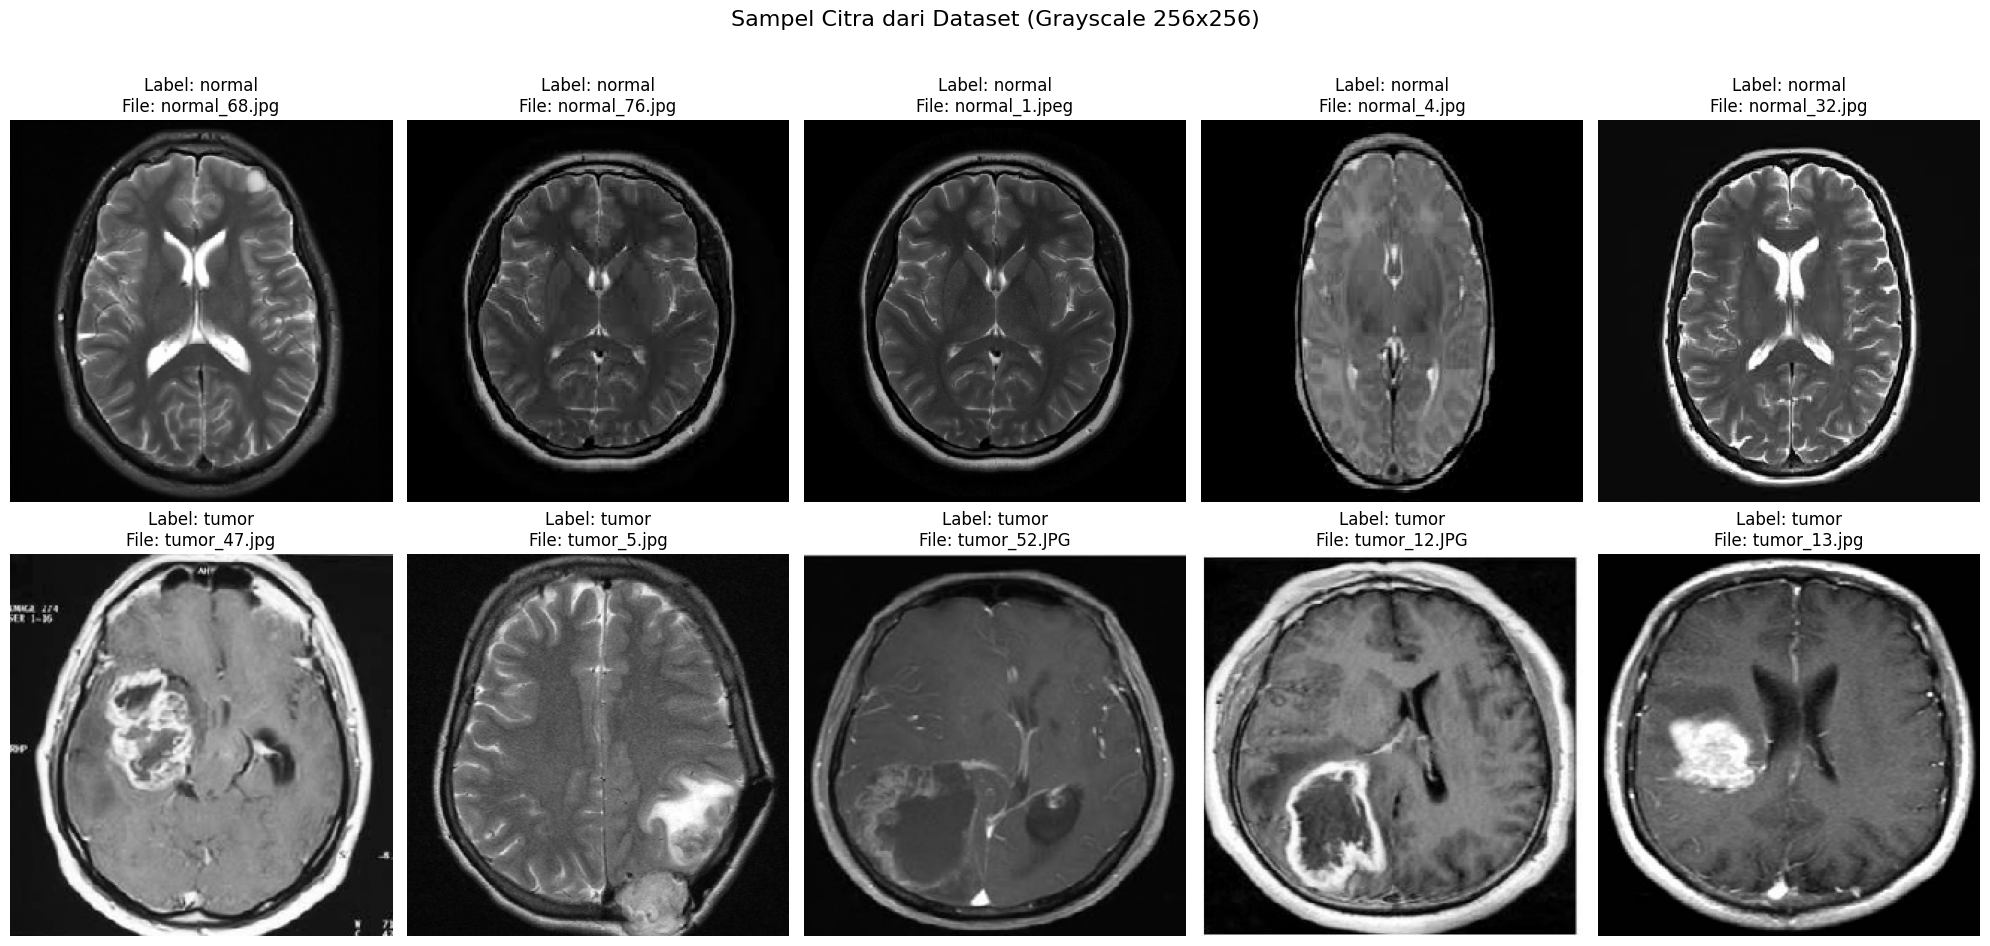

In [4]:
# Mengubah list labels menjadi pandas Series untuk memudahkan penghitungan
label_series = pd.Series(labels)

# Menghitung jumlah kemunculan setiap label
label_counts = label_series.value_counts()

# Membuat diagram batang
plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Distribusi Jumlah Data per Label')
plt.xlabel('Label Kelas')
plt.ylabel('Jumlah Citra')
plt.show()

# Menampilkan jumlah data dan label secara keseluruhan
print(f"Total jumlah citra dalam dataset: {len(data)}")
print(f"Total jumlah label dalam dataset: {len(labels)}")
print(f"Jumlah kelas unik: {len(label_counts)}")
print("\nJumlah citra per kelas:")
print(label_counts)

# Mendapatkan indeks untuk kelas 'normal' dan 'tumor'
normal_indices = np.where(labels == 'normal')[0]
tumor_indices = np.where(labels == 'tumor')[0]

# Mengambil 5 sampel acak jika jumlahnya lebih dari 5, atau semua sampel jika kurang dari 5
num_samples_to_show = 5
if len(normal_indices) >= num_samples_to_show:
    sample_normal_indices = np.random.choice(normal_indices, num_samples_to_show, replace=False)
else:
    sample_normal_indices = normal_indices

if len(tumor_indices) >= num_samples_to_show:
    sample_tumor_indices = np.random.choice(tumor_indices, num_samples_to_show, replace=False)
else:
    sample_tumor_indices = tumor_indices
    
# Menggabungkan indeks sampel
sample_indices = np.concatenate((sample_normal_indices, sample_tumor_indices))

# Menampilkan citra sampel
plt.figure(figsize=(20, 10))
plt.suptitle('Sampel Citra dari Dataset (Grayscale 256x256)', fontsize=16)
for i, index in enumerate(sample_indices):
    plt.subplot(2, num_samples_to_show, i + 1)
    plt.imshow(data[index], cmap='gray') # Menampilkan citra grayscale
    plt.title(f"Label: {labels[index]}\nFile: {file_name[index]}")
    plt.axis('off')
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Menyesuaikan layout agar supertitle tidak tumpang tindih
plt.show()

## Data Preparation

Tahap persiapan data, yang dilakukan setelah pemuatan data awal (dan augmentasi data jika diterapkan), bertujuan untuk memastikan bahwa seluruh data citra, baik yang asli maupun yang telah diaugmentasi, berada dalam format yang seragam dan siap untuk diolah lebih lanjut dengan berbagai teknik preprocessing spesifik. Pada titik ini, setiap citra telah dikonversi menjadi format grayscale untuk menyederhanakan analisis dengan menghilangkan informasi warna yang mungkin tidak relevan, serta ukurannya telah diseragamkan (dalam kode contoh menjadi 256x256 piksel) untuk

### Define Preprocessing Function


### Metode Resize

Fungsi `resize` digunakan untuk mengubah ukuran citra ke dimensi lebar (`width`) dan tinggi (`height`) yang diinginkan. Fungsi ini pertama-tama mendapatkan dimensi asli (`old_height`, `old_width`) dari `image` masukan menggunakan `image.shape[:2]`. Kemudian, ia membuat sebuah array NumPy baru bernama `resized` dengan dimensi target (`height`, `width`) dan tipe data yang sama dengan `image` asli, menangani kasus untuk citra berwarna (3 channel) maupun grayscale (1 channel). Rasio perubahan ukuran (`x_ratio`, `y_ratio`) dihitung untuk memetakan koordinat piksel dari citra baru ke citra asli. Dengan melakukan iterasi untuk setiap piksel (`x, y`) pada `resized`, koordinat piksel yang bersesuaian pada `image` asli (`x_ori`, `y_ori`) dihitung menggunakan interpolasi nearest-neighbor (pembulatan ke bilangan bulat terdekat) dan dipastikan tidak melebihi batas dimensi `image` asli menggunakan fungsi `min`. Akhirnya, nilai piksel dari `image[y_ori, x_ori]` disalin ke `resized[y, x]`, dan citra `resized` yang telah diubah ukurannya dikembalikan.

In [5]:
def resize(image, width, height):
    old_height, old_width = image.shape[:2]
    
    if len(image.shape) == 3:
        resized = np.zeros((height, width, image.shape[2]), dtype=image.dtype)
    else:
        resized = np.zeros((height, width), dtype=image.dtype)
    
    x_ratio = old_width / width
    y_ratio = old_height / height
    
    for y in range(height):
        for x in range(width):

            x_ori = int(x * x_ratio)
            y_ori = int(y * y_ratio)
            
            x_ori = min(x_ori, old_width - 1)
            y_ori = min(y_ori, old_height - 1)
            
            if len(image.shape) == 3:
                resized[y, x] = image[y_ori, x_ori]
            else:
                resized[y, x] = image[y_ori, x_ori]
                
    return resized

### Metode Ekualisasi

Fungsi `ekualisasi` menerapkan teknik ekualisasi histogram pada citra grayscale masukan (`img`) untuk meningkatkan kontras. Pertama, fungsi mendapatkan dimensi `baris` dan `kolom` dari `img` dan membuat `canvas` kosong dengan ukuran yang sama. Kemudian, array `nk` (histogram) berukuran 256 diinisialisasi dengan nol untuk menghitung frekuensi setiap tingkat keabuan. Dengan melakukan iterasi pada setiap piksel `img[i,j]`, nilai piksel `val` digunakan untuk menambah count pada `nk[val]`. Setelah itu, `nk` dinormalisasi menjadi `pr` (probabilitas kemunculan setiap tingkat keabuan) dengan membaginya dengan total jumlah piksel. Array `sk` (histogram kumulatif) dihitung dengan mengakumulasikan nilai `pr`. Nilai `sk` kemudian diskalakan ke rentang 0-255 dan dibulatkan menjadi `sk_round` dengan tipe data `uint8`. Terakhir, setiap piksel `val` pada `img` dipetakan ke nilai baru pada `canvas` menggunakan `sk_round[val]`, dan `canvas` yang telah diekualisasi dikembalikan.

In [6]:
def ekualisasi(img):
    baris, kolom = img.shape
    canvas = np.zeros_like(img)

    nk = np.zeros(256)

    for i in range(baris):
        for j in range (kolom):
            val = img[i,j]
            nk[val] += 1

    pr = nk / np.sum(nk)
    sk = np.zeros(256)

    for i in range(256):
        if i == 0: 
            sk[i] = pr[i]
        else:
            sk[i] = sk[i-1] + pr[i] 

    sk_round = np.round(sk * 255).astype(np.uint8)

    for i in range(baris):
        for j in range (kolom):  
            val = img[i,j]
            canvas[i,j] = sk_round[val]

    return canvas

### Metode Konvolusi

Fungsi `convolusi` melakukan operasi konvolusi pada citra masukan `(image)` menggunakan kernel tertentu. Ukuran tinggi dan lebar citra (`h`, `w`) serta kernel (`kh`, `kw`) diambil terlebih dahulu, dan padding dihitung setengah ukuran kernel. Citra dipad dengan metode `'edge'` menggunakan `np.pad`, untuk menyalin nilai piksel tepi agar ukuran hasil tetap sama. Array `result` diinisialisasi sebagai array kosong bertipe `np.float32`. Fungsi mengiterasi setiap piksel citra, mengambil region lokal berukuran sama dengan kernel, lalu mengalikan elemen-wise antara region dan kernel. Hasilnya dijumlahkan dengan `np.sum(region * kernel)` dan disimpan di posisi piksel yang sesuai pada `result`. Fungsi mengembalikan nilai `result`

In [7]:
def convolusi(image, kernel):
    h, w = image.shape
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2

    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='edge')
    result = np.zeros_like(image, dtype=np.float32)

    for i in range(h):
        for j in range(w):
            region = padded[i:i+kh, j:j+kw]
            result[i, j] = np.sum(region * kernel)

    return result

### Metode Sobel

Fungsi `sobel` melakukan deteksi tepi pada citra masukan `(image)` menggunakan operator Sobel. Dua kernel Sobel yaitu `Kx` untuk mendeteksi tepi vertikal dan `Ky` untuk tepi horizontal. Masing-masing kernel diterapkan ke citra menggunakan fungsi `convolusi`. Hasil konvolusi terhadap `Kx` dan `Ky` disimpan dalam `Gx` dan `Gy`. Besarnya gradien tepi dihitung dengan rumus `√(Gx² + Gy²)` untuk memperoleh nilai `G`. Nilai `G` kemudian dikalikan 2.0 untuk meningkatkan kontras tepi. Nilai `G` diklip ke rentang 0–255 dan dikonversi ke `uint8`. Sebelum dikembalikan, nilai gradien dibalik `(255 - G)`.

In [8]:
def sobel(image):
    Kx = np.array([
        [-2, 0, 2],
        [-4, 0, 4], 
        [-2, 0, 2]
    ])
    Ky = np.array([
        [-2, -4, -2],
        [ 0,  0,  0],
        [ 2,  4,  2]
    ])
    
    Gx = convolusi(image, Kx)
    Gy = convolusi(image, Ky)
    
    G = np.sqrt(Gx**2 + Gy**2)
    G = G * 2.0
    G = np.clip(G, 0, 255)
    G = 255 - G.astype(np.uint8)
    return G

### Metode Sharpening

Fungsi `sharpening` melakukan penajaman citra `(image)` menggunakan kernel konvolusi 3x3. Kernel dirancang untuk memperkuat detail dan tepi objek dalam citra, dengan menekankan nilai tengah dan mengurangi kontribusi tetangganya. Citra diubah menjadi tipe `np.float32` untuk operasi pecahan. Ukuran citra disimpan dalam `height` dan `width`, lalu `result` diinisialisasi sebagai array kosong dengan ukuran yang sama. Fungsi mengiterasi setiap piksel (kecuali tepi), mengambil region 3x3 di sekitar piksel tersebut. Region dikalikan elemen-wise dengan kernel, kemudian dijumlahkan dan dibagi 2 untuk menghasilkan nilai piksel hasil penajaman. Nilai hasil kemudian diklip ke rentang 0–255 dan dikonversi kembali ke `uint8`. Fungsi mengembalikan `result`.

In [9]:
def sharpening(image):
    kernel = np.array([
        [1/9,1/9,1/9],
        [1/9,8/9,1/9],
        [1/9,1/9,1/9]
    ])

    image = image.astype(np.float32)
    height, width = image.shape
    result = np.zeros((height, width), dtype=np.float32)
    
    for i in range(1, height-1):
        for j in range(1, width-1):
            region = image[i-1:i+2, j-1:j+2]
            result[i, j] = np.sum(region * kernel)/2
    
    result = np.clip(result, 0, 255).astype(np.uint8)
    
    return result

Memuat contoh citra 1: dataset\normal\normal_1.jpeg
Memuat contoh citra 2: dataset\normal\normal_10.jpg
Memuat contoh citra 3: dataset\normal\normal_11.jpeg


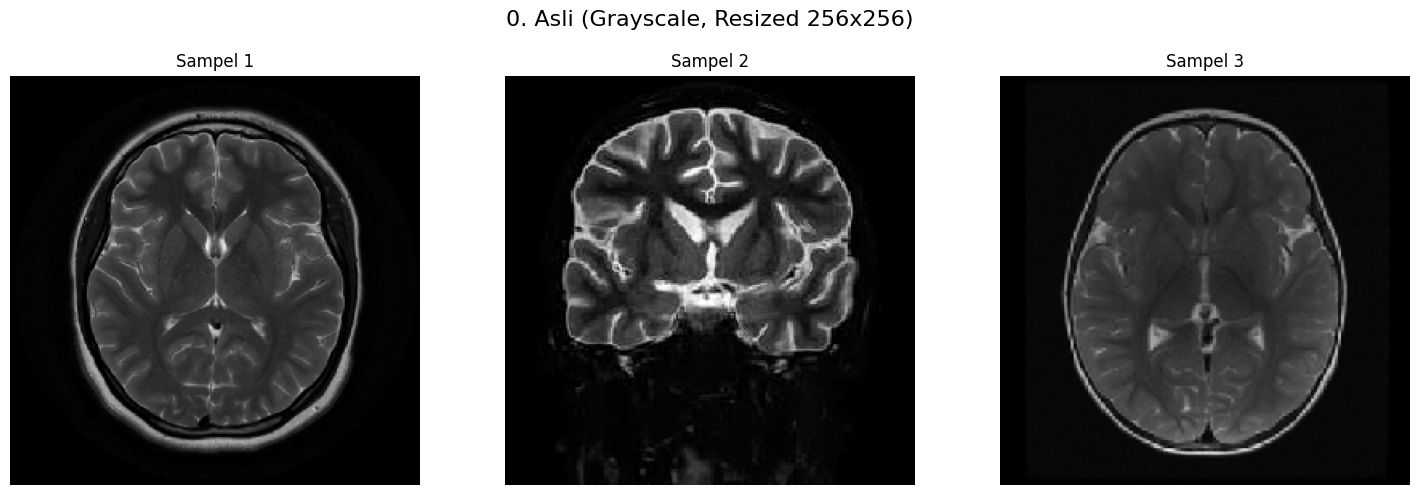

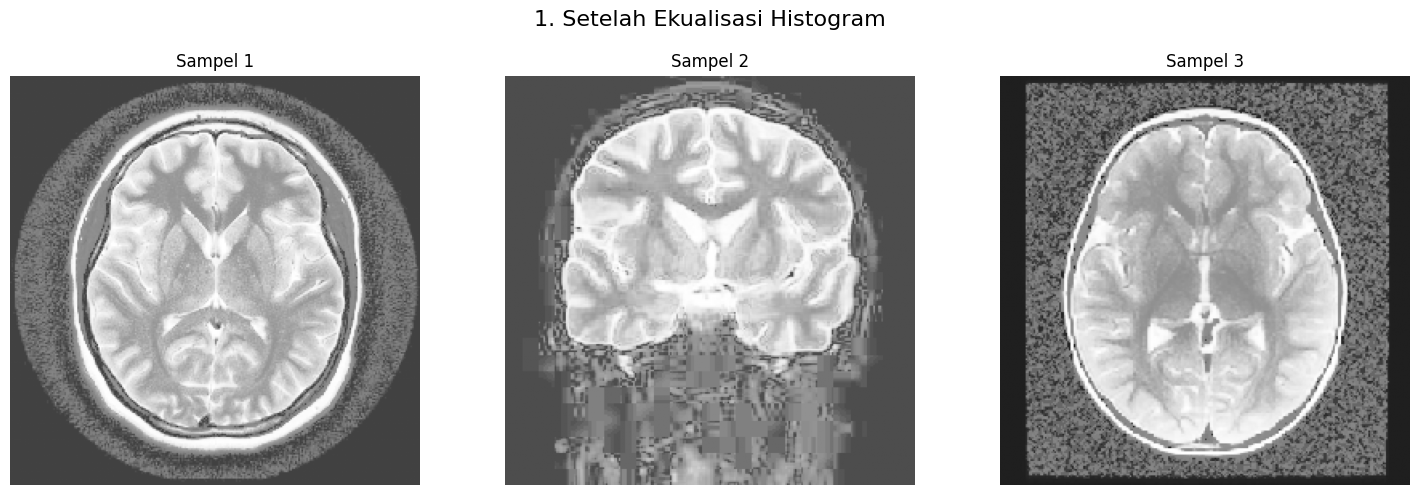

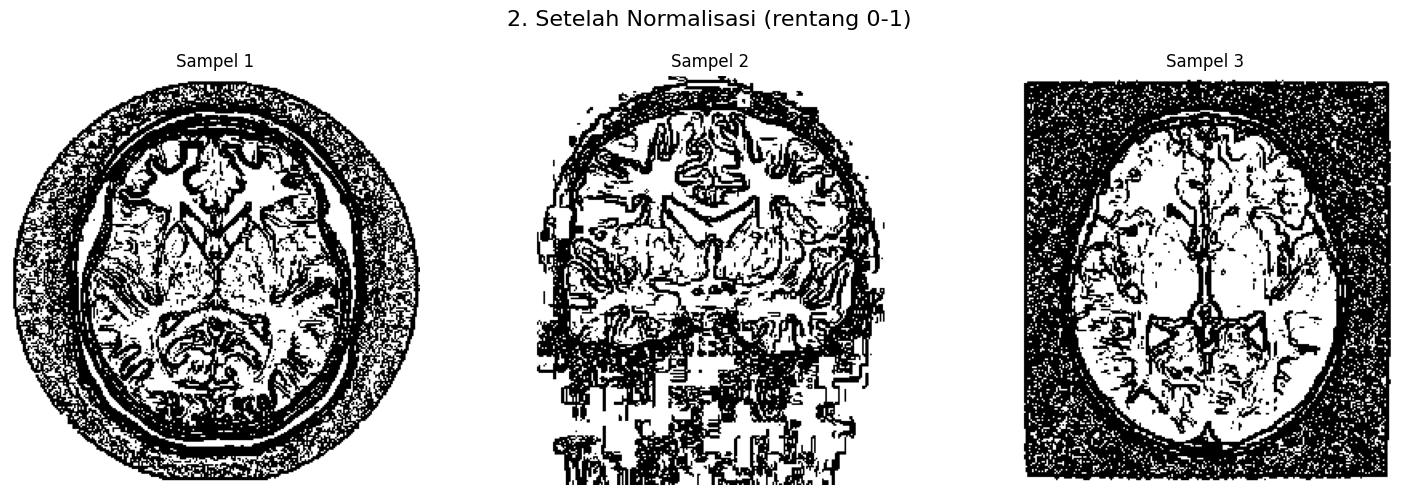

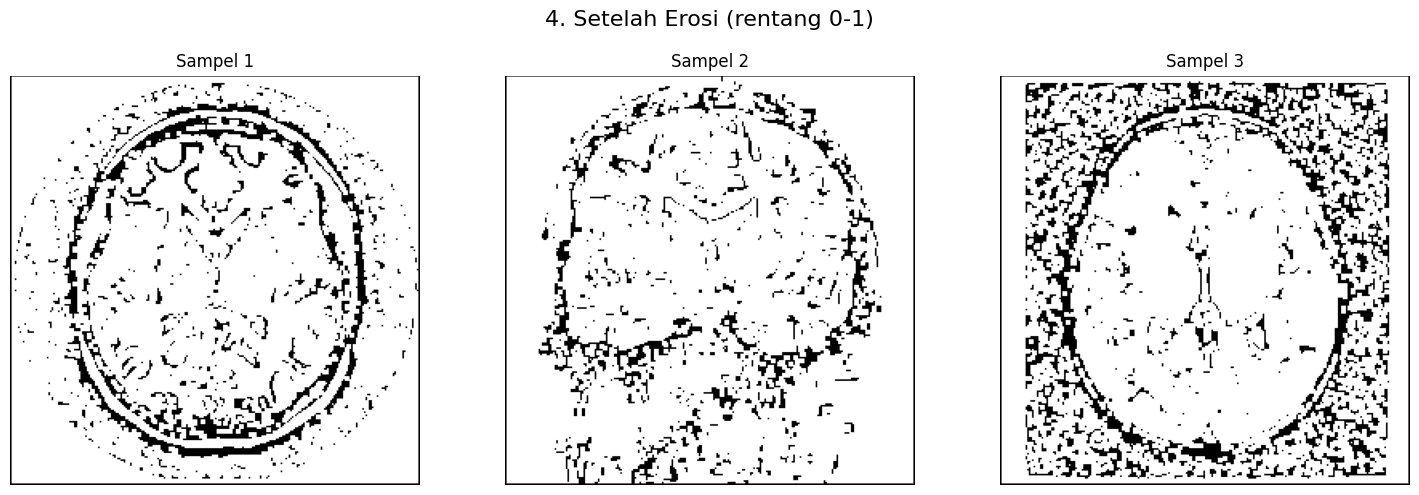

In [10]:
# --- Data Loading (Modifikasi untuk memuat hingga 3 contoh citra) ---
data_dir = "dataset"
sample_images_original_gray_resized = [] # List untuk menyimpan hingga 3 citra asli
num_samples_to_load = 3
images_loaded_count = 0

folders_to_try = ["normal", "tumor"] # Folder yang akan dicoba untuk dimuat citranya
for sub_folder_name in folders_to_try:
    if images_loaded_count >= num_samples_to_load: # Hentikan jika sudah cukup sampel
        break
    sub_folder_path = os.path.join(data_dir, sub_folder_name)
    if os.path.exists(sub_folder_path) and os.listdir(sub_folder_path):
        # Ambil semua file gambar dari subfolder
        image_files = [f for f in os.listdir(sub_folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]
        for img_file in image_files:
            if images_loaded_count >= num_samples_to_load: # Hentikan jika sudah cukup sampel
                break
            img_path = os.path.join(sub_folder_path, img_file)
            img_original_bgr = cv.imread(img_path) # Baca citra dalam format BGR
            if img_original_bgr is not None:
                img_original_gray = cv.cvtColor(img_original_bgr, cv.COLOR_BGR2GRAY) # Konversi ke grayscale
                img_resized = resize(img_original_gray, 256, 256) # Resize citra
                sample_images_original_gray_resized.append(img_resized)
                images_loaded_count += 1
                print(f"Memuat contoh citra {images_loaded_count}: {img_path}")
            else:
                print(f"Gagal membaca citra: {img_path}")
    else:
        print(f"Folder {sub_folder_path} tidak ditemukan atau kosong.")

if not sample_images_original_gray_resized:
    print("Gagal memuat contoh citra. Pastikan path dataset benar dan ada citra di dalamnya.")
    # Buat citra dummy jika gagal memuat agar kode tetap berjalan untuk demonstrasi fungsi
    for _ in range(num_samples_to_load):
        dummy_img = np.random.randint(0, 256, (256, 256), dtype=np.uint8)
        sample_images_original_gray_resized.append(dummy_img)
    print(f"Menggunakan {len(sample_images_original_gray_resized)} citra dummy untuk demonstrasi.")


# --- Terapkan Preprocessing dan Tampilkan (3 sampel per metode) ---

# 0. Citra Asli (Grayscale dan Resized)
if sample_images_original_gray_resized: # Pastikan ada citra untuk diproses
    num_actual_samples = len(sample_images_original_gray_resized)
    
    plt.figure(figsize=(5 * num_actual_samples, 5))
    plt.suptitle("0. Asli (Grayscale, Resized 256x256)", fontsize=16)
    for i, img in enumerate(sample_images_original_gray_resized):
        plt.subplot(1, num_actual_samples, i + 1)
        plt.imshow(img, cmap='gray', vmin=0, vmax=255)
        plt.title(f"Sampel {i+1}")
        plt.axis('off')
    plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust layout to make space for suptitle
    plt.show()

    # 1. Ekualisasi
    processed_ekualisasi_list = []
    plt.figure(figsize=(5 * num_actual_samples, 5))
    plt.suptitle("1. Setelah Ekualisasi Histogram", fontsize=16)
    for i, original_img in enumerate(sample_images_original_gray_resized):
        img_ekualisasi = ekualisasi(original_img)
        processed_ekualisasi_list.append(img_ekualisasi)
        plt.subplot(1, num_actual_samples, i + 1)
        plt.imshow(img_ekualisasi, cmap='gray', vmin=0, vmax=255)
        plt.title(f"Sampel {i+1}")
        plt.axis('off')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # 2. Sobel (diterapkan pada hasil ekualisasi)
    processed_sobel_list = []
    plt.figure(figsize=(5 * num_actual_samples, 5))
    plt.suptitle("2. Setelah Normalisasi (rentang 0-1)", fontsize=16)
    for i, img_so in enumerate(processed_ekualisasi_list): # Gunakan hasil dari tahap ekualisasi
        img_sobel = sobel(img_so)
        processed_sobel_list.append(img_sobel)
        plt.subplot(1, num_actual_samples, i + 1)
        plt.imshow(img_sobel, cmap='gray', vmin=0, vmax=1.0) # vmin/vmax untuk float [0,1]
        plt.title(f"Sampel {i+1}")
        plt.axis('off')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # 3. sharpening (diterapkan pada hasil sobbel)
    processed_sharpening_list = []
    plt.figure(figsize=(5 * num_actual_samples, 5))
    plt.suptitle("4. Setelah Erosi (rentang 0-1)", fontsize=16)
    for i, img_sh in enumerate(processed_sobel_list): # Gunakan hasil dari tahap erosi
        img_sharpening = sharpening(img_sh)
        processed_sharpening_list.append(img_sharpening)
        plt.subplot(1, num_actual_samples, i + 1)
        plt.imshow(img_sharpening, cmap='gray', vmin=0, vmax=1.0) # vmin/vmax untuk float [0,1]
        plt.title(f"Sampel {i+1}")
        plt.axis('off')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
else:
    print("Tidak ada citra untuk diproses dan ditampilkan.")

### Preprocessing

### Peningkatan Kontras Sederhana
1. **Ekualisasi** untuk perbaikan kontras awal.
2. **Sobel** untuk mengekstrasi deteksi tepi batas dan bentuk dari citra.
3. **Sharpening** untuk menajamkan detail dan batas objek dalam citra.
4. **Konversi langsung ke `uint8`** tanpa operasi morfologi.
5. **Tujuan**: Memperbaiki kontras dan menonjolkan tepi serta detail objek melalui deteksi tepi dan penajaman.

In [11]:
dataPreprocessed = []

for i in range(len(data)):
    processed = ekualisasi(data[i])
    processed = sobel(processed)
    processed = sharpening(processed)
    processed_uint8 = (processed * 255).round().astype(np.uint8)
    dataPreprocessed.append(processed_uint8)


### Feature Extraction

### Fungsi GLCM

Fungsi `glcm` bertujuan untuk menghitung matriks GLCM dari sebuah `image` masukan berdasarkan `derajat` sudut yang ditentukan (0, 45, 90, atau 135 derajat). Fungsi ini menggunakan `graycomatrix` dari library `skimage.feature` untuk membuat matriks ko-kejadian. Jarak antar piksel diatur ke 1 (pixeldistance=1), jumlah tingkat keabuan adalah 256, dan matriks dibuat simetris (symmetric=True) serta dinormalisasi (normed=True) sehingga nilainya merepresentasikan probabilitas. Jika `derajat` yang dimasukkan tidak valid, fungsi akan menampilkan `ValueError`.

In [12]:
def glcm(image, derajat):
    if derajat == 0:
        angles = [0]
    elif derajat == 45:
        angles = [np.pi / 4]
    elif derajat == 90:
        angles = [np.pi / 2]
    elif derajat == 135:
        angles = [3 * np.pi / 4]
    else:
        raise ValueError("Invalid angle. It should be one of the following: 0, 45, 90, 135.")
    
    # mengembalikan matrix glcm dari image
    glcm = graycomatrix(image, [1], angles, 256, symmetric=True, normed=True)
    return glcm

### Fungsi correlation

Fungsi `correlation` menghitung fitur korelasi dari `matriks` GLCM. Korelasi mengukur seberapa terkait linear piksel-piksel tetangga pada citra; nilai tinggi menunjukkan prediktabilitas linear yang tinggi.

In [13]:
def correlation(matriks):
	return graycoprops(matriks, 'correlation')[0, 0]

### Fungsi dissimilarity

Fungsi `dissimilarity` menghitung fitur dissimilarity dari `matriks` GLCM. Dissimilarity mengukur seberapa berbeda nilai piksel tetangga; nilai tinggi menunjukkan kontras lokal yang lebih besar.

In [14]:
def dissimilarity(matriks):
    return graycoprops(matriks, 'dissimilarity')[0, 0]

### Fungsi homogeneity

Fungsi `homogeneity` (homogenitas) menghitung fitur homogenitas dari `matriks` GLCM. Homogenitas mengukur kedekatan distribusi elemen dalam GLCM terhadap diagonal GLCM; nilai tinggi menunjukkan lebih banyak kesamaan lokal.

In [15]:
def homogenity(matriks):
    return graycoprops(matriks, 'homogeneity')[0, 0]

### Fungsi contrast

Fungsi `contrast` menghitung fitur kontras dari `matriks` GLCM. Kontras mengukur variasi intensitas lokal dalam citra; nilai tinggi menunjukkan variasi yang signifikan.

In [16]:
def contrast(matriks):
    return graycoprops(matriks, 'contrast')[0, 0]

### Fungsi ASM (Angular Second Moment)

Fungsi `ASM` menghitung fitur Angular Second Moment (ASM) dari `matriks` GLCM. ASM adalah ukuran homogenitas citra; nilai tinggi menunjukkan keseragaman yang lebih besar.

In [17]:
def ASM(matriks):
    return graycoprops(matriks, 'ASM')[0, 0]

### Fungsi energy

Fungsi `energy` menghitung fitur energi dari `matriks` GLCM. Energi adalah akar kuadrat dari ASM dan juga merupakan ukuran keseragaman tekstur.

In [18]:
def energy(matriks):
    return graycoprops(matriks, 'energy')[0, 0]

### Fungsi entropyGlcM

Fungsi `entropyGlcM` menghitung entropi dari `matriks` GLCM yang telah diratakan (`matriks.ravel()`) menggunakan fungsi `entropy` dari `skimage.measure`. Entropi adalah ukuran ketidakaturan atau kompleksitas tekstur dalam citra; nilai tinggi menunjukkan tekstur yang lebih kompleks dan kurang teratur.

In [19]:
def entropyGlcm(matriks):
    return entropy(matriks.ravel())

### Perhitungan Gray Level Co-occurrence Matrix (GLCM)

Tahapan ini bertujuan untuk menghitung Gray Level Co-occurrence Matrix (GLCM) untuk setiap citra yang telah melalui tahap preprocessing (`dataPreprocessed`) pada empat orientasi sudut yang berbeda. 

Pertama, empat list kosong diinisialisasi: `Derajat0`, `Derajat45`, `Derajat90`, dan `Derajat135`. Setiap list akan digunakan untuk menyimpan matriks GLCM yang dihasilkan dari setiap sudut (0°, 45°, 90°, dan 135°). 

Kemudian, kode melakukan iterasi melalui setiap citra dalam `dataPreprocessed`. Dalam loop, untuk setiap citra `dataPreprocessed[i]`, fungsi `glcm()` dipanggil empat kali dengan parameter sudut yang berbeda (0°, 45°, 90°, dan 135°) untuk menghitung GLCM pada masing-masing orientasi tersebut. Hasil perhitungan GLCM untuk setiap sudut (misalnya, `D0` untuk 0°, `D45` untuk 45°, dan seterusnya) kemudian ditambahkan ke dalam list yang sesuai (`Derajat0`, `Derajat45`, dll).

Setelah loop selesai, setiap list akan berisi kumpulan matriks GLCM yang spesifik untuk orientasi sudutnya, yang mencakup seluruh dataset citra yang telah diproses.

In [20]:
Derajat0 = []
Derajat45 = []
Derajat90 = []
Derajat135 = []
for i in range(len(dataPreprocessed)):
    D0 = glcm(dataPreprocessed[i], 0)
    D45 = glcm(dataPreprocessed[i], 45)
    D90 = glcm(dataPreprocessed[i], 90)
    D135 = glcm(dataPreprocessed[i], 135)
    Derajat0.append(D0)
    Derajat45.append(D45)
    Derajat90.append(D90)
    Derajat135.append(D135)

### Inisialisasi List untuk Menyimpan Fitur Tekstur GLCM

Bagian kode ini melakukan inisialisasi serangkaian list kosong yang akan digunakan untuk menyimpan nilai-nilai fitur tekstur yang diekstraksi dari Gray Level Co-occurrence Matrix (GLCM) pada empat orientasi sudut yang berbeda (0°, 45°, 90°, dan 135°). Secara spesifik, untuk setiap sudut, list-list terpisah dibuat untuk menampung fitur-fitur berikut:

- **`Kontras0, Kontras45, Kontras90, Kontras135`**: Untuk menyimpan fitur kontras.
- **`dissimilarity0, dissimilarity45, dissimilarity90, dissimilarity135`**: Untuk menyimpan fitur ketidaksamaan (dissimilarity).
- **`homogenity0, homogenity45, homogenity90, homogenity135`**: Untuk menyimpan fitur homogenitas.
- **`entropy0, entropy45, entropy90, entropy135`**: Untuk menyimpan fitur entropi.
- **`ASM0, ASM45, ASM90, ASM135`**: Untuk menyimpan fitur Angular Second Moment (ASM).
- **`energy0, energy45, energy90, energy135`**: Untuk menyimpan fitur energi.
- **`correlation0, correlation45, correlation90, correlation135`**: Untuk menyimpan fitur korelasi.

Inisialisasi list ini merupakan langkah persiapan sebelum melakukan iterasi melalui matriks-matriks GLCM (yang sebelumnya telah dihitung dan disimpan dalam `Derajat0`, `Derajat45`, `Derajat90`, dan `Derajat135`) untuk menghitung dan kemudian menyimpan nilai-nilai fitur tekstur tersebut ke dalam list yang sesuai berdasarkan jenis fitur dan orientasi sudutnya.

In [21]:
Kontras0, Kontras45, Kontras90, Kontras135 = [], [], [], []
dissimilarity0, dissimilarity45, dissimilarity90, dissimilarity135 =  [], [], [], []
homogenity0, homogenity45, homogenity90, homogenity135 = [], [], [], []
entropy0, entropy45, entropy90, entropy135 =  [], [], [], []
ASM0, ASM45, ASM90, ASM135 =  [], [], [], []
energy0, energy45, energy90, energy135 =  [], [], [], []
correlation0, correlation45, correlation90, correlation135 = [], [], [], []

### Proses Perulangan untuk Menghitung Fitur Dissimilarity

Loop ini mengiterasi sebanyak jumlah data yang telah melalui tahap preprocessing (`dataPreprocessed`). Untuk setiap GLCM yang tersimpan dalam `Derajat0[i]`, `Derajat45[i]`, `Derajat90[i]`, dan `Derajat135[i]`, fungsi `dissimilarity()` dipanggil untuk menghitung nilai fitur dissimilarity. Nilai dissimilarity yang dihasilkan untuk masing-masing sudut (misalnya, `Dis0` untuk 0°) kemudian ditambahkan ke list yang sesuai (`dissimilarity0`, `dissimilarity45`, `dissimilarity90`, `dissimilarity135`).

In [22]:
for i in range(len(dataPreprocessed)):
    C0 = correlation(Derajat0[i])
    correlation0.append(C0)
    C45 = correlation(Derajat45[i])
    correlation45.append(C45)
    C90 = correlation(Derajat90[i])
    correlation90.append(C90)
    C135 = correlation(Derajat135[i])
    correlation135.append(C135)

### Proses Perulangan untuk Menghitung Fitur Kontras

Loop ini mengiterasi sebanyak jumlah data yang tersimpan dalam variabel `data`. Untuk setiap GLCM yang tersimpan dalam `Derajat0[i]`, `Derajat45[i]`, `Derajat90[i]`, dan `Derajat135[i]`, fungsi `contrast()` dipanggil untuk menghitung nilai fitur kontras. Nilai kontras yang dihasilkan untuk masing-masing sudut (misalnya, `K0` untuk 0°) kemudian ditambahkan ke list yang sesuai (`Kontras0`, `Kontras45`, `Kontras90`, `Kontras135`).

In [23]:
for i in range(len(data)):
    K0 = contrast(Derajat0[i])
    K45 = contrast(Derajat45[i])
    K90 = contrast(Derajat90[i])
    K135 = contrast(Derajat135[i])
    Kontras0.append(K0)
    Kontras45.append(K45)
    Kontras90.append(K90)
    Kontras135.append(K135)

### Proses Perulangan untuk Menghitung Fitur Dissimilarity

Loop ini mengiterasi sebanyak jumlah data yang tersimpan dalam variabel `data`. Untuk setiap GLCM yang tersimpan dalam `Derajat0[i]`, `Derajat45[i]`, `Derajat90[i]`, dan `Derajat135[i]`, fungsi `dissimilarity()` dipanggil untuk menghitung nilai fitur dissimilarity. Nilai dissimilarity yang dihasilkan untuk masing-masing sudut (misalnya, `Dis0` untuk 0°) kemudian ditambahkan ke list yang sesuai (`dissimilarity0`, `dissimilarity45`, `dissimilarity90`, `dissimilarity135`).

In [24]:
for i in range(len(data)):
    Dis0 = dissimilarity(Derajat0[i])
    Dis45 = dissimilarity(Derajat45[i])
    Dis90 = dissimilarity(Derajat90[i])
    Dis135 = dissimilarity(Derajat135[i])
    dissimilarity0.append(Dis0)
    dissimilarity45.append(Dis45)
    dissimilarity90.append(Dis90)
    dissimilarity135.append(Dis135)

### Proses Perulangan untuk Menghitung Fitur Homogenitas

Loop ini mengiterasi sebanyak jumlah data yang tersimpan dalam variabel `data`. Untuk setiap GLCM yang tersimpan dalam `Derajat0[i]`, `Derajat45[i]`, `Derajat90[i]`, dan `Derajat135[i]`, fungsi `homogenity()` dipanggil untuk menghitung nilai fitur homogenitas. Nilai homogenitas yang dihasilkan untuk masing-masing sudut (misalnya, `H0` untuk 0°) kemudian ditambahkan ke list yang sesuai (`homogenity0`, `homogenity45`, `homogenity90`, `homogenity135`).

In [25]:
for i in range(len(data)):
    H0 = homogenity(Derajat0[i])
    H45 = homogenity(Derajat45[i])
    H90 = homogenity(Derajat90[i])
    H135 = homogenity(Derajat135[i])
    homogenity0.append(H0)
    homogenity45.append(H45)
    homogenity90.append(H90)
    homogenity135.append(H135)

### Proses Perulangan untuk Menghitung Fitur Entropi

Loop ini mengiterasi sebanyak jumlah data yang tersimpan dalam variabel `data`. Untuk setiap GLCM yang tersimpan dalam `Derajat0[i]`, `Derajat45[i]`, `Derajat90[i]`, dan `Derajat135[i]`, fungsi `entropyGlcm()` dipanggil untuk menghitung nilai fitur entropi. Nilai entropi yang dihasilkan untuk masing-masing sudut (misalnya, `E0` untuk 0°) kemudian ditambahkan ke list yang sesuai (`entropy0`, `entropy45`, `entropy90`, `entropy135`).

In [26]:
for i in range(len(data)):  
    E0 = entropyGlcm(Derajat0[i])
    E45 = entropyGlcm(Derajat45[i])
    E90 = entropyGlcm(Derajat90[i])
    E135 = entropyGlcm(Derajat135[i])
    entropy0.append(E0)
    entropy45.append(E45)
    entropy90.append(E90)
    entropy135.append(E135)

### Proses Perulangan untuk Menghitung Fitur ASM

Loop ini mengiterasi sebanyak jumlah data yang tersimpan dalam variabel `data`. Untuk setiap GLCM yang tersimpan dalam `Derajat0[i]`, `Derajat45[i]`, `Derajat90[i]`, dan `Derajat135[i]`, fungsi `ASM()` dipanggil untuk menghitung nilai fitur Angular Second Moment (ASM). Nilai ASM yang dihasilkan untuk masing-masing sudut (misalnya, `A0` untuk 0°) kemudian ditambahkan ke list yang sesuai (`ASM0`, `ASM45`, `ASM90`, `ASM135`).

In [27]:
for i in range(len(data)):
    A0 = ASM(Derajat0[i])
    A45 = ASM(Derajat45[i])
    A90 = ASM(Derajat90[i])
    A135 = ASM(Derajat135[i])
    ASM0.append(A0)
    ASM45.append(A45)
    ASM90.append(A90)
    ASM135.append(A135)

### Proses Perulangan untuk Menghitung Fitur Energi

Loop ini mengiterasi sebanyak jumlah data yang tersimpan dalam variabel `data`. Untuk setiap GLCM yang tersimpan dalam `Derajat0[i]`, `Derajat45[i]`, `Derajat90[i]`, dan `Derajat135[i]`, fungsi `energy()` dipanggil untuk menghitung nilai fitur energi. Nilai energi yang dihasilkan untuk masing-masing sudut (misalnya, `ER0` untuk 0°) kemudian ditambahkan ke list yang sesuai (`energy0`, `energy45`, `energy90`, `energy135`).

In [28]:
for i in range(len(data)):
    ER0 = energy(Derajat0[i])
    ER45 = energy(Derajat45[i])
    ER90 = energy(Derajat90[i])
    ER135 = energy(Derajat135[i])
    energy0.append(ER0)
    energy45.append(ER45)
    energy90.append(ER90)
    energy135.append(ER135)

### Proses Pembuatan DataFrame

Bagian kode ini bertujuan untuk mengompilasi semua hasil ekstraksi fitur yang telah dihitung ke dalam suatu struktur data tabel (DataFrame) menggunakan library Pandas. DataFrame ini akan berisi informasi tentang nama file citra (`Filename`), label kelas (`Label`), serta nilai dari berbagai fitur tekstur yang diekstraksi dari matriks GLCM untuk empat orientasi sudut yang berbeda (0°, 45°, 90°, dan 135°).

In [29]:
dataTable = {'Filename': file_name, 'Label': labels,
        'Contrast0': Kontras0, 'Contrast45': Kontras45, 'Contrast90': Kontras90, 'Contrast135': Kontras135,
        'Homogeneity0': homogenity0, 'Homogeneity45': homogenity45, 'Homogeneity90': homogenity90, 'Homogeneity135': homogenity135,
        'Dissimilarity0': dissimilarity0, 'Dissimilarity45': dissimilarity45, 'Dissimilarity90': dissimilarity90, 'Dissimilarity135': dissimilarity135,
        'Entropy0': entropy0, 'Entropy45': entropy45, 'Entropy90': entropy90, 'Entropy135': entropy135,
        'ASM0': ASM0, 'ASM45': ASM45, 'ASM90': ASM90, 'ASM135': ASM135,
        'Energy0': energy0, 'Energy45': energy45, 'Energy90': energy90, 'Energy135': energy135,
        'Correlation0': correlation0, 'Correlation45': correlation45, 'Correlation90': correlation90, 'Correlation135': correlation135,
        }
df = pd.DataFrame(dataTable)
df.to_csv('hasil_ekstraksi_4.csv', index=False)

hasilEkstrak = pd.read_csv('hasil_ekstraksi_4.csv')
hasilEkstrak


,Filename,Label,Contrast0,Contrast45,Contrast90,Contrast135,Homogeneity0,Homogeneity45,Homogeneity90,Homogeneity135,...,ASM90,ASM135,Energy0,Energy45,Energy90,Energy135,Correlation0,Correlation45,Correlation90,Correlation135
0,normal_1.jpeg,normal,5447.220772,7491.446367,5406.836244,7579.197724,0.324159,0.277107,0.324036,0.274937,...,0.040942,0.036415,0.202931,0.190859,0.202342,0.190828,0.705425,0.592914,0.707609,0.588145
1,normal_10.jpg,normal,4972.551195,7259.558324,4739.637040,7203.327643,0.362925,0.311169,0.393019,0.311288,...,0.064206,0.057536,0.248400,0.239935,0.253389,0.239867,0.714970,0.582370,0.728320,0.585605
2,normal_11.jpeg,normal,7488.623836,10715.717924,7190.069577,10727.358800,0.281844,0.208548,0.298219,0.207590,...,0.021334,0.013713,0.140848,0.117171,0.146063,0.117100,0.597621,0.421179,0.613663,0.420550
3,normal_12.jpg,normal,7514.045650,11376.618624,7216.425582,11468.528812,0.340907,0.229440,0.333138,0.229682,...,0.027883,0.018726,0.166787,0.137677,0.166983,0.136844,0.593653,0.382097,0.609748,0.377105
4,normal_13.jpg,normal,5374.765012,7558.292749,4816.225368,7586.156586,0.398637,0.299292,0.410807,0.299880,...,0.058048,0.050552,0.234290,0.224868,0.240932,0.224838,0.684749,0.555095,0.717509,0.553455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,tumor_95.jpg,tumor,8615.171170,12460.841522,8568.790196,12628.288935,0.452610,0.369488,0.451261,0.368282,...,0.067227,0.053054,0.259523,0.231254,0.259282,0.230334,0.618353,0.447399,0.620408,0.439973
194,tumor_96.jpg,tumor,6030.375888,8152.962245,5940.470374,8369.115048,0.338567,0.294789,0.341076,0.292774,...,0.053679,0.048343,0.231585,0.220058,0.231688,0.219871,0.661904,0.541299,0.666944,0.529138
195,tumor_97.jpg,tumor,4942.530668,6746.316371,4741.535539,6631.148266,0.301970,0.247114,0.310462,0.248431,...,0.037626,0.033671,0.193475,0.183328,0.193975,0.183497,0.712442,0.605085,0.724136,0.611826
196,tumor_98.jpg,tumor,7090.594608,10298.482614,7100.509773,10373.245152,0.241055,0.162347,0.231460,0.163257,...,0.016682,0.010003,0.128644,0.100209,0.129160,0.100015,0.593723,0.406567,0.593155,0.402259


## Features Selection

### Seleksi Fitur Berbasis Korelasi

Seleksi fitur dilakukan dengan menghitung matriks korelasi fitur-fitur dalam dataset menggunakan `correlation = hasilEkstrak.drop(columns=['Label','Filename']).corr()`. Fitur dengan korelasi absolut lebih dari 0.95 dihilangkan untuk mengurangi redundansi dan memperbaiki kinerja model. Kode `for` digunakan untuk memeriksa pasangan fitur dan menandai fitur yang akan dihapus. Fitur yang dipertahankan disimpan dalam `x_new`, sedangkan label disimpan dalam `y = hasilEkstrak['Label']`. Hasilnya visualisasikan dengan heatmap menggunakan `sns.heatmap(x_new.corr(), annot=True, cmap='Blues', fmt=".2f")`, memberikan gambaran jelas tentang korelasi fitur-fitur yang dipertahankan.

<Axes: >

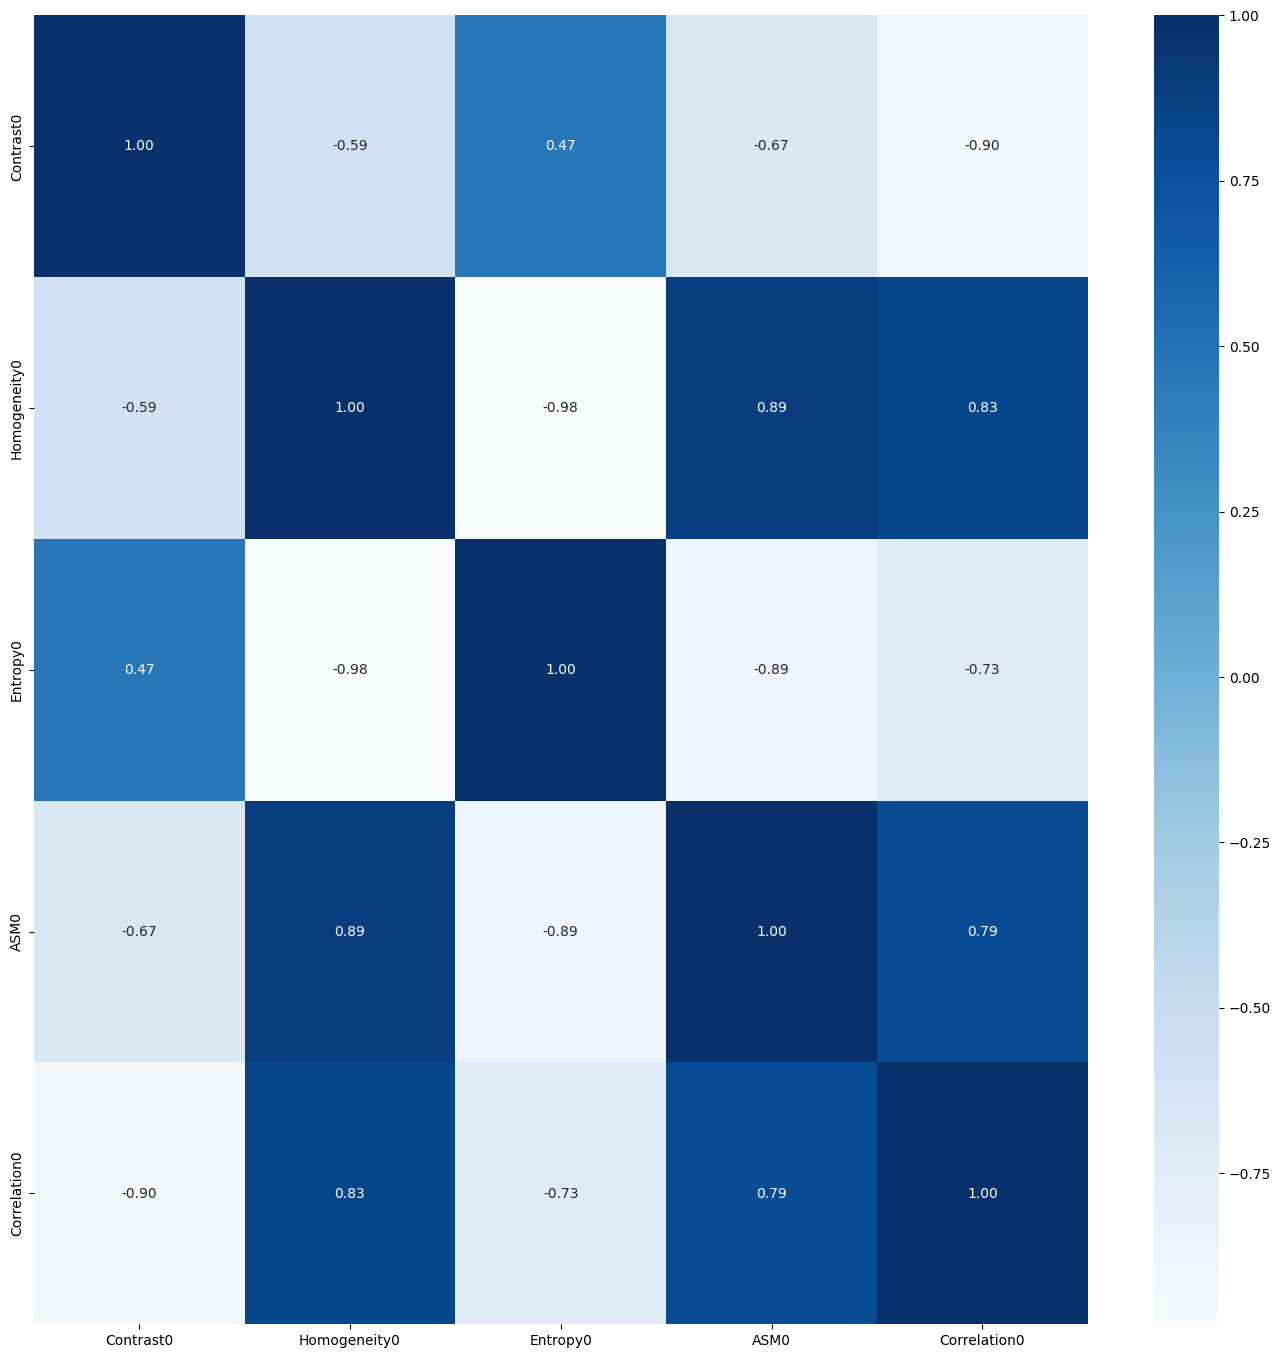

In [30]:
# Menghitung korelasi
correlation = hasilEkstrak.drop(columns=['Label','Filename']).corr()

# Menyaring fitur yang memiliki korelasi absolut lebih dari 0.95 dengan label
threshold = 0.95 # atur threshold ini untuk menentukan seberapa besar korelasi yang ingin disaring
selectionFeature = []
columns = np.full((correlation.shape[0],), True, dtype=bool)
for i in range(correlation.shape[0]):
	for j in range(i+1, correlation.shape[0]):
		if correlation.iloc[i,j] >= threshold:
			if columns[j]:
				columns[j] = False
select = hasilEkstrak.drop(columns=['Label','Filename']).columns[columns]
x_new = hasilEkstrak[select]
x_new
y = hasilEkstrak['Label']
plt.figure(figsize=(17,17))
sns.heatmap(x_new.corr(), annot=True, cmap='Blues', fmt=".2f")

## Splitting Data

Kode berikut ini menggunakan fungsi `train_test_split` dari library scikit-learn untuk membagi dataset menjadi dua bagian: set pelatihan (training set) dan set pengujian (test set).

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(158, 5)
(40, 5)


## Feature Normalization

### Normalisasi Data dengan Mean dan Standar Deviasi

Kode berikut ini melakukan normalisasi data menggunakan mean dan standar deviasi dari set pelatihan (`X_train`). Normalisasi ini bertujuan untuk menjadikan data memiliki mean nol dan standar deviasi satu, yang dapat meningkatkan kinerja dan kestabilan model machine learning tertentu.

In [32]:
X_test = (X_test - X_train.mean()) / X_train.std()
X_train = (X_train - X_train.mean()) / X_train.std()

## Modeling

### Define Model

Fungsi `generateClassificationReport(y_true, y_pred)` digunakan untuk mencetak metrik evaluasi dari hasil prediksi model klasifikasi, yaitu classification report (precision, recall, f1-score), confusion matrix, dan akurasi. Di bawahnya, didefinisikan tiga model klasifikasi: `RandomForestClassifier` dengan 5 pohon keputusan, `SVC` (Support Vector Machine) dengan kernel RBF, dan `KNeighborsClassifier` dengan jumlah tetangga terdekat sebanyak 5. Ketiga model ini siap digunakan untuk pelatihan dan evaluasi performa klasifikasi.


In [33]:
def generateClassificationReport(y_true, y_pred):
	print(classification_report(y_true, y_pred))
	print(confusion_matrix(y_true, y_pred))
	print('Accuracy:', accuracy_score(y_true, y_pred))

# Define classifiers
rf = RandomForestClassifier(n_estimators=5, random_state=42)
svm = SVC(kernel='rbf', random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

### Train Random Forest Classifier

Kode ini melatih model Random Forest (`rf`) menggunakan data latih (`X_train`, `y_train`), lalu mengevaluasinya pada dua dataset: training dan testing. Setelah pelatihan, model memprediksi label pada data latih dan hasilnya dievaluasi menggunakan fungsi `generateClassificationReport` untuk melihat performa di data latih. Selanjutnya, model memprediksi data uji (`X_test`) dan kembali dievaluasi untuk mengetahui performa generalisasi model terhadap data yang belum pernah dilihat.


In [34]:
# Train Random Forest Classifier
rf.fit(X_train, y_train)

# Make predictions and evaluate the model with the training set
print("------Training Set------")
y_pred = rf.predict(X_train)
generateClassificationReport( y_train, y_pred)

# Make predictions and evaluate the model with the testing set
print("\n------Testing Set------")
y_pred = rf.predict(X_test)
generateClassificationReport( y_test, y_pred)

------Training Set------
              precision    recall  f1-score   support

      normal       0.96      0.94      0.95        79
       tumor       0.94      0.96      0.95        79

    accuracy                           0.95       158
   macro avg       0.95      0.95      0.95       158
weighted avg       0.95      0.95      0.95       158

[[74  5]
 [ 3 76]]
Accuracy: 0.9493670886075949

------Testing Set------
              precision    recall  f1-score   support

      normal       0.63      0.63      0.63        19
       tumor       0.67      0.67      0.67        21

    accuracy                           0.65        40
   macro avg       0.65      0.65      0.65        40
weighted avg       0.65      0.65      0.65        40

[[12  7]
 [ 7 14]]
Accuracy: 0.65


### Train SVM Classifier

Kode ini melatih model Support Vector Machine (`svm`) menggunakan data latih (`X_train`, `y_train`), kemudian mengevaluasi performanya pada data training dan testing. Prediksi dilakukan terhadap data latih untuk menilai apakah model overfitting atau tidak, lalu diuji lagi pada data uji (`X_test`) untuk mengukur kemampuan generalisasi model. Evaluasi hasil dilakukan dengan fungsi `generateClassificationReport` yang menampilkan classification report, confusion matrix, dan akurasi.


In [35]:
# Train SVM Classifier
svm.fit(X_train, y_train)

# Make predictions and evaluate the model with the training set
print("\n------Training Set------")
y_pred = svm.predict(X_train)
generateClassificationReport( y_train, y_pred)

# Make predictions and evaluate the model with the testing set
print("\n------Testing Set------")
y_pred = svm.predict(X_test)
generateClassificationReport( y_test, y_pred)


------Training Set------
              precision    recall  f1-score   support

      normal       0.66      0.65      0.65        79
       tumor       0.65      0.67      0.66        79

    accuracy                           0.66       158
   macro avg       0.66      0.66      0.66       158
weighted avg       0.66      0.66      0.66       158

[[51 28]
 [26 53]]
Accuracy: 0.6582278481012658

------Testing Set------
              precision    recall  f1-score   support

      normal       0.79      0.79      0.79        19
       tumor       0.81      0.81      0.81        21

    accuracy                           0.80        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.80      0.80      0.80        40

[[15  4]
 [ 4 17]]
Accuracy: 0.8


### Train KNN Classifier

Kode ini melatih model K-Nearest Neighbors (`knn`) dengan data latih (`X_train`, `y_train`), lalu mengevaluasi performanya pada data training dan testing. Setelah pelatihan, model memprediksi data latih untuk melihat kecocokan terhadap data yang telah dipelajari, kemudian diuji pada data uji (`X_test`) guna mengevaluasi kemampuan generalisasinya. Evaluasi dilakukan menggunakan fungsi `generateClassificationReport` yang mencetak classification report, confusion matrix, dan akurasi model.


In [36]:
# Train KNN Classifier
knn.fit(X_train, y_train)

# Make predictions and evaluate the model with the training set
print("\n------Training Set------")
y_pred = knn.predict(X_train)
generateClassificationReport( y_train, y_pred)

# Make predictions and evaluate the model with the testing set
print("\n------Testing Set------")
y_pred = knn.predict(X_test)
generateClassificationReport( y_test, y_pred)



------Training Set------
              precision    recall  f1-score   support

      normal       0.69      0.76      0.72        79
       tumor       0.73      0.66      0.69        79

    accuracy                           0.71       158
   macro avg       0.71      0.71      0.71       158
weighted avg       0.71      0.71      0.71       158

[[60 19]
 [27 52]]
Accuracy: 0.7088607594936709

------Testing Set------
              precision    recall  f1-score   support

      normal       0.68      0.68      0.68        19
       tumor       0.71      0.71      0.71        21

    accuracy                           0.70        40
   macro avg       0.70      0.70      0.70        40
weighted avg       0.70      0.70      0.70        40

[[13  6]
 [ 6 15]]
Accuracy: 0.7


## Evaluation With Confusion Matrix

Fungsi `plot_confusion_matrix` digunakan untuk menampilkan confusion matrix dari hasil prediksi model secara visual menggunakan `matplotlib`, dengan parameter judul yang ditampilkan di atas grafik. Selanjutnya, fungsi ini dipanggil untuk memvisualisasikan confusion matrix dari ketiga model klasifikasi (Random Forest, SVM, dan KNN) berdasarkan hasil prediksi terhadap data uji (`X_test`) guna mempermudah analisis kesalahan klasifikasi tiap model.


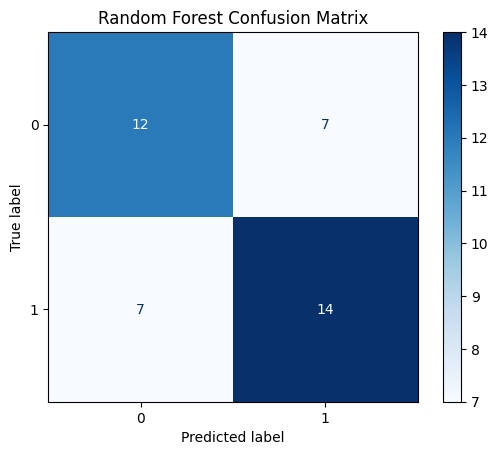

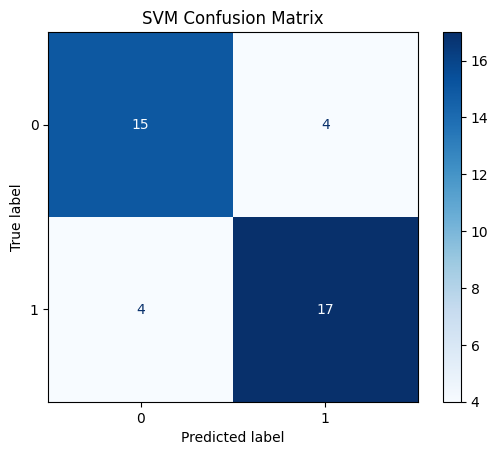

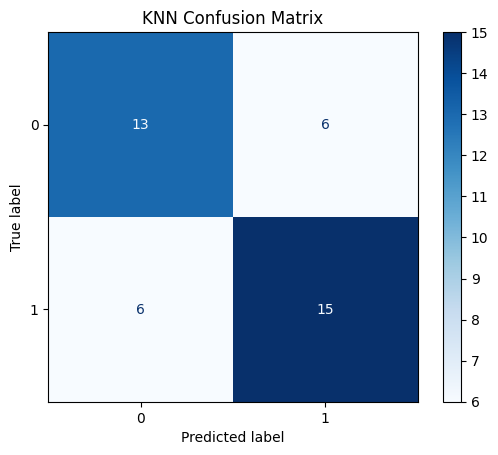

In [37]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Plot confusion matrix for Random Forest
plot_confusion_matrix(y_test, rf.predict(X_test), "Random Forest Confusion Matrix")
# Plot confusion matrix for SVM
plot_confusion_matrix(y_test, svm.predict(X_test), "SVM Confusion Matrix")
# Plot confusion matrix for KNN
plot_confusion_matrix(y_test, knn.predict(X_test), "KNN Confusion Matrix")